In [1]:
from time import time

from lagom.experiment import SimpleExperiment
from lagom.algos.goal_selection import GoalSelection



algo = GoalSelection()
experiment = SimpleExperiment(num_configs=10)

experiment.add_algo(algo)

start_time = time()
experiment.benchmark(num_process=10)
print(f'\nTotal time: {time() - start_time:.2f} s')

##################################################
# Job ID: 0         
##################################################

# Outer Iteration # 1    
# Sampled Goal [4, 3]
------------------------------------------------------------
Iteration # 1
	Loss                          3.6842172145843506
	Num Episodes                  1
	Average Return                1.0
	Std Return                    0.0
	Min Return                    1
	Max Return                    1
optimal steps: 5

# Success rate over goal space: 0.19375
# Average Return over all goals: [0.4, 0.2, 0.0, 0.0, 0.8, 0.3, 0.0, 0.0, 0.6, 0.3, 0.1, 0.0, 0.3, 0.1, 0.0, 0.0]

# Outer Iteration # 2    
# Sampled Goal [2, 2]
------------------------------------------------------------
Iteration # 1
	Loss                          0.0
	Num Episodes                  1
	Average Return                0.0
	Std Return                    0.0
	Min Return                    0
	Max Return                    0
optimal steps: 2

# Success rate o

In [3]:
import numpy as np

a = np.prod([1, 2, 3])
b = 3
print(type(a))
print(type(b))

<class 'numpy.int64'>
<class 'int'>


In [53]:
import torch.nn as nn

nn.Linear(int(a), int(a))

Linear(in_features=6, out_features=6)

In [1]:
from lagom.envs import GymEnv

from lagom.envs.wrappers import FlattenObservation, SparseReward

import gym

env = gym.make('CartPole-v0')

env2 = GymEnv(env)

env3 = FlattenObservation(env2)

env4 = SparseReward(env3)

env.reset()
env.step(env.action_space.sample())

(array([-0.01358755, -0.24014793,  0.02587832,  0.28452905]), 1.0, False, {})

In [2]:
env2.observation_space == env4.observation_space

True

In [4]:
from gym_maze.envs import MazeEnv
from gym_maze.envs import RandomBlockMazeGenerator
maze = RandomBlockMazeGenerator(maze_size=4, obstacle_ratio=0.0)
env = MazeEnv(maze, action_type='VonNeumann', render_trace=False)

env.maze_size

(6, 6)

In [33]:
from lagom.envs.spaces import Box

a = Box(0, env.maze_size[0]-1, shape=(4,))

# Plot learning curves

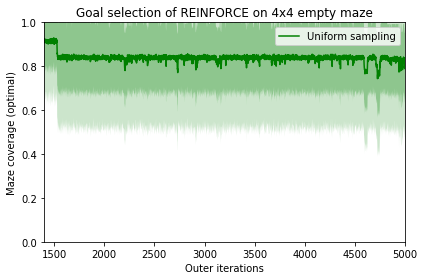

In [15]:
import numpy as np
from lagom.core.plotter import Plotter

from glob import glob  # matching pathnames with patterns

def plotting():
    # Create a plotter
    plotter = Plotter()

    # Needed info
    infos = ['Success rate over goal space']

    for info in infos:
#         list_coverages_linear = []
#         for f in glob('logs/ID_*_eval.npy'):
#             coverages = list(np.load(f).item()[info].values())
#             list_coverages_linear.append(coverages)
            
        list_coverages_uniform = []
        for f in glob('logs/ID_*_eval_uniform.npy'):
            coverages = list(np.load(f).item()[info].values())
            list_coverages_uniform.append(coverages)

#     # Add curve of coverages over different random seeds
#     plotter.add_curve(list_coverages_linear, 
#                       color='red', 
#                       label='[2, 2]->[3, 3]->[4, 4]', 
#                       uncertainty=True, 
#                       scales=[0.5, 1.0], 
#                       alphas=[0.3, 0.2])
    
    plotter.add_curve(list_coverages_uniform, 
                      color='green', 
                      label='Uniform sampling', 
                      uncertainty=True, 
                      scales=[0.5, 1.0], 
                      alphas=[0.3, 0.2])

    title = 'Goal selection of REINFORCE on 4x4 empty maze'
    xlabel = 'Outer iterations'
    ylabel = 'Maze coverage (optimal)'
    xlim = [1400, 5000]
    ylim = [0, 1]
    fig = plotter.plot(title, xlabel, ylabel, xlim=xlim, ylim=ylim, log_x=False, integer_x=False)

    return fig



fig = plotting()
fig.savefig('tmp.png')

# Animation of heatmaps (success coverage)

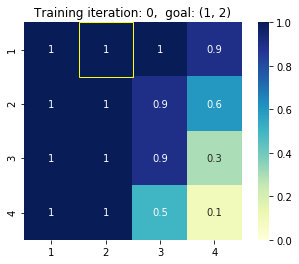

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle

from lagom.core.plotter import Plotter

from IPython.display import HTML


fig, ax = plt.subplots(1, 1)

plotter = Plotter()

path = 'logs/ID_0_eval_uniform.npy'
info = 'Average Return over all goals'

goals = [goal for iter_num, goal in np.load(path).item()[info].keys()]
anim_data = list(np.load(path).item()[info].values())
num_data = len(anim_data)

map_size = 4

def animate(i):
    fig.clear()
    
    data = np.array(anim_data[i]).reshape([map_size, map_size])

    ax = plotter.heatmap(data, 
                         vmin=0, 
                         vmax=1, 
                         cmap='YlGnBu', 
                         annot=True, 
                         linewidths=.0, 
                         square=True, 
                         xticklabels=np.arange(1, map_size+1), 
                         yticklabels=np.arange(1, map_size+1))
    
    ax.set_title('Training iteration: {},  goal: {}'.format(i, goals[i]))
    
    ax.add_patch(Rectangle(np.array(goals[i][::-1])-1, 1, 1, fill=False, edgecolor='yellow'))

anim = animation.FuncAnimation(fig, animate, frames=num_data, interval=2000)

anim.save('tmp.gif', writer='imagemagick', fps=.5)

HTML(anim.to_html5_video())